# Install the libs

In [ ]:
!pip3 install pandas numpy matplotlib
!pip3 install scikit-learn
!pip3 install google-colab
!pip3 install tensorflow

# Load the libs

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load the E2.csv dataset

In [ ]:
file_name = 'E2.csv'
# Define a function to convert time to text
def convert_time_to_text(value):
    return str(value)

# Specify the converters dictionary
converters = {'Time': convert_time_to_text}

# Read the CSV file with converters
data = pd.read_csv(file_name, converters=converters)

# Display the first few rows of your dataset to check the column names
print(data.head())
print(data.columns)
print(data.dtypes)
print(data.describe())
print(data.info())

    Time       HoTe            AwTe  FTHG  FTAG FTR  HTHG  HTAG HTR  \
0  15:00   Barnsley       Port Vale     7     0   H     2     0   H   
1  15:00  Blackpool          Burton     2     0   H     2     0   H   
2  15:00     Bolton         Lincoln     3     0   H     1     0   H   
3  15:00  Cambridge          Oxford     2     0   H     2     0   H   
4  15:00   Carlisle  Fleetwood Town     1     1   D     1     1   D   

             Ref  ...  HBP  ABP  HTTG  FTTG  TS  TST  TC  TF  TY  TR  
0         D Rock  ...   60   20     2     7  25   12   9  29   8   0  
1  S Stockbridge  ...   40   10     2     2  24    7  11  22   5   0  
2       W Finnie  ...   30   30     1     3  22    4  11  35   6   0  
3         S Gill  ...   40   10     2     2  20    9  12  19   5   0  
4       P Wright  ...   20   30     2     2  28   11   7  26   5   0  

[5 rows x 32 columns]
Index(['Time', 'HoTe', 'AwTe', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR',
       'Ref', 'HS', 'AS', 'HST', 'AST', 'HF', '

# Define the feature columns and target columns

In [ ]:
# Define the feature columns and target columns
text_categorical_features = ["Time", "HoTe", "AwTe", "Ref"]
integer_target_columns = ["FTHG", "FTAG", "HTHG", "HTAG", "HS", "AS", "HST", "AST", "HF", "AF", "HC", "AC", "HY", "AY", "HR", "AR", "HBP", "ABP", "HTTG", "FTTG", "TS", "TST", "TC", "TF", "TY", "TR"]
y_columns = ['FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'HBP', 'ABP', 'HTTG', 'FTTG', 'TS', 'TST', 'TC', 'TF', 'TY', 'TR']
text_categorical_target_columns = ["FTR", "HTR"]

# One-hot encode the 'Time' column
X_encoded_time = pd.get_dummies(data[['Time']])
X_encoded_time.columns = ['Time_' + str(col) for col in X_encoded_time.columns]  # Add a prefix to the column names
X_encoded_time.reset_index(drop=True, inplace=True)  # Reset the index for proper concatenation

# Combine one-hot-encoded 'Time' with other text-categorical features
X_encoded = pd.concat([data.drop(['Time'], axis=1), X_encoded_time, pd.get_dummies(data[text_categorical_features])], axis=1)
X_encoded = X_encoded.drop(integer_target_columns, axis=1)
X_encoded = X_encoded.drop(["HoTe", "AwTe", "Ref", "FTR", "HTR"], axis=1)
# Replace 'True' with 1 and 'False' with 0 in X_encoded
X_encoded = X_encoded.applymap(lambda x: 1 if x == True else (0 if x == False else x))

# One-hot encode the text-categorical target columns
y_encoded = pd.get_dummies(data[text_categorical_target_columns])
y_encoded_copy = y_encoded
y_encoded_copy = y_encoded_copy.applymap(lambda x: 1 if x == True else (0 if x == False else x))
print("One-hot encoded dummies for y_encoded: ")
print(y_encoded)

One-hot encoded dummies for y_encoded: 
      FTR_A  FTR_D  FTR_H  HTR_A  HTR_D  HTR_H
0         0      0      1      0      0      1
1         0      0      1      0      0      1
2         0      0      1      0      0      1
3         0      0      1      0      0      1
4         0      1      0      0      1      0
...     ...    ...    ...    ...    ...    ...
1239      1      0      0      1      0      0
1240      0      1      0      0      0      1
1241      1      0      0      1      0      0
1242      0      0      1      0      0      1
1243      1      0      0      1      0      0

[1244 rows x 6 columns]


# Scale the input values of integer_target_columns

In [ ]:
# Define the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the input values of integer_target_columns
data[integer_target_columns] = scaler.fit_transform(data[integer_target_columns])
y_encoded = pd.concat([y_encoded, data[integer_target_columns]], axis=1)
# Replace 'True' with 1 and 'False' with 0 in y_encoded
y_encoded = y_encoded.applymap(lambda x: 1 if x == True else (0 if x == False else x))

# Combine one-hot-encoded targets with the original dataframe excluding text-categorical target columns
data_encoded = pd.concat([X_encoded, y_encoded], axis=1)

# Print the resulting dataframe
print("data_encoded: ")
print(data_encoded)

X = X_encoded
y = y_encoded
print("X: ")
print(X)
print("y: ")
print(y)

data_encoded: 
      Time_Time_12:00  Time_Time_12:30  Time_Time_13:00  Time_Time_14:00  \
0                   0                0                0                0   
1                   0                0                0                0   
2                   0                0                0                0   
3                   0                0                0                0   
4                   0                0                0                0   
...               ...              ...              ...              ...   
1239                0                1                0                0   
1240                0                1                0                0   
1241                0                1                0                0   
1242                0                1                0                0   
1243                0                1                0                0   

      Time_Time_15:00  Time_Time_15:15  Time_Time_17:15  Time_Time_17:30

# Define the model

In [ ]:
# Assuming X and y are your input and output dataframes
# Convert X and y to numpy arrays
X = X.values
y = y.values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Define the model
model = tf.keras.models.Sequential()

# Input layer
print("X.shape[1]: ")
print(X.shape[1])

X.shape[1]: 
169


# Train the model

In [ ]:
model.add(tf.keras.layers.Input(shape=(X.shape[1],)))

# Hidden layers
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))

# Output layer
print("y.shape[1]: ")
print(y.shape[1])
model.add(tf.keras.layers.Dense(y.shape[1], activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
# model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1)
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1)

# Save the model
model.save('my_model.h5')

y.shape[1]: 
32
Epoch 1/50
63/63 [==============================] - 2s 8ms/step - loss: 0.6589 - accuracy: 9.9305e-04 - val_loss: 0.6089 - val_accuracy: 0.0000e+00
Epoch 2/50
63/63 [==============================] - 0s 3ms/step - loss: 0.5767 - accuracy: 0.0070 - val_loss: 0.5609 - val_accuracy: 0.0714
Epoch 3/50
63/63 [==============================] - 0s 3ms/step - loss: 0.5554 - accuracy: 0.1539 - val_loss: 0.5532 - val_accuracy: 0.0804
Epoch 4/50
63/63 [==============================] - 0s 3ms/step - loss: 0.5513 - accuracy: 0.1619 - val_loss: 0.5519 - val_accuracy: 0.1429
Epoch 5/50
63/63 [==============================] - 0s 3ms/step - loss: 0.5495 - accuracy: 0.1748 - val_loss: 0.5512 - val_accuracy: 0.2411
Epoch 6/50
63/63 [==============================] - 0s 3ms/step - loss: 0.5471 - accuracy: 0.2562 - val_loss: 0.5508 - val_accuracy: 0.1429
Epoch 7/50
63/63 [==============================] - 0s 3ms/step - loss: 0.5440 - accuracy: 0.2671 - val_loss: 0.5507 - val_accuracy: 0.2

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Plot training accuracy

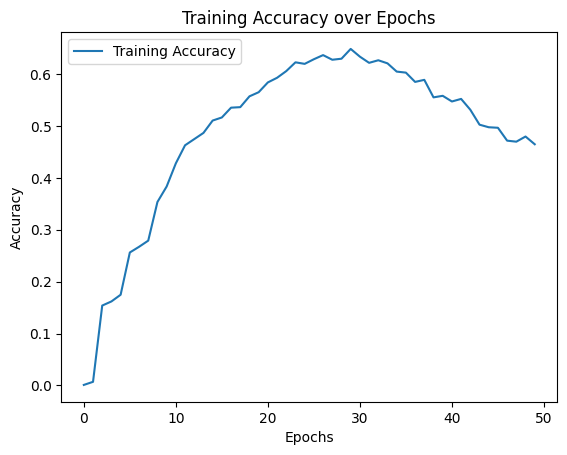

In [ ]:
# Access training history
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']

# Plot training accuracy
plt.plot(training_accuracy, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs')
plt.legend()
plt.show()

# Plot validation loss

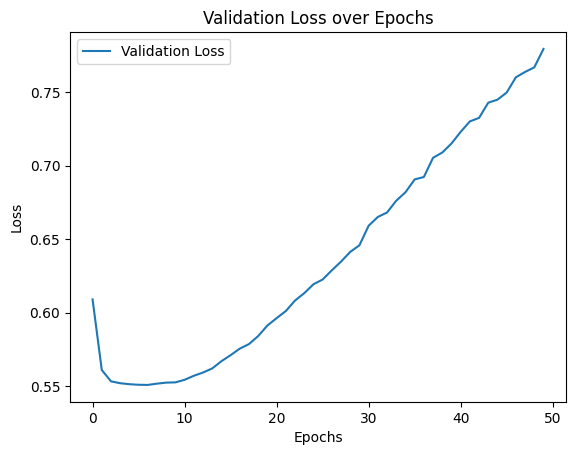

In [ ]:
# Plot validation loss
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss over Epochs')
plt.legend()
plt.show()

# Evaluate the model on the test set

In [ ]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)

# Convert predicted probabilities to binary values
y_pred_binary = (y_pred > 0.5).astype(int)
y_pred_binary = y_pred
print("X_test: ")
print(X_test)
print("y_pred_binary: ")
print(y_pred_binary)

4/4 [==============================] - 0s 4ms/step
X_test: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
y_pred_binary: 
[[1.8643537e-03 9.7214746e-01 5.5404834e-02 ... 3.1655896e-01
  2.9652593e-01 1.6626108e-02]
 [6.1014044e-01 8.6149588e-02 5.4082770e-02 ... 4.3385500e-01
  3.4605259e-01 8.8324569e-02]
 [9.8857701e-01 2.8402971e-02 1.3312633e-04 ... 4.6644831e-01
  3.3062577e-01 3.2653630e-02]
 ...
 [9.9845779e-01 1.3622956e-02 1.0794919e-07 ... 4.1732848e-01
  1.8234497e-01 4.7209654e-02]
 [3.0959463e-01 6.5815421e-03 4.4953349e-01 ... 5.0950646e-01
  3.0303121e-01 3.9007731e-02]
 [9.8525399e-01 1.1994192e-01 4.4316994e-06 ... 4.8643091e-01
  3.3003274e-01 1.7380306e-02]]


# Evaluate the model on the test set for each output column
## Save and reload the model for making predictions

In [ ]:
# Evaluate the model on the test set for each output column
mae_scores = []
for i in range(y.shape[1]):
    y_true_column = y_test[:, i]
    y_pred_column = y_pred[:, i]

    mae = mean_absolute_error(y_true_column, y_pred_column)
    mae_scores.append(mae)

# Calculate the mean MAE across all output columns
mean_mae = sum(mae_scores) / len(mae_scores)
print(f'Mean MAE: {mean_mae}')

# Save and reload the model for making predictions
model.save('my_model.h5')
model = tf.keras.models.load_model('my_model.h5')

Mean MAE: 0.18685012603001627


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Define the new data

In [ ]:
# Define the new data
new_data = pd.DataFrame({'Time': ['15:00'], 'HoTe': ['Blackpool'], 'AwTe': ['Burton'], 'Ref': ['S Stockbridge']})

# One-hot encode the 'Time' column
new_data_encoded_time = pd.get_dummies(new_data[['Time']])
new_data_encoded_time.columns = ['Time_' + str(col) for col in new_data_encoded_time.columns]  # Add a prefix to the column names
new_data_encoded_time.reset_index(drop=True, inplace=True)  # Reset the index for proper concatenation

# Combine one-hot-encoded 'Time' with other text-categorical features
new_data_encoded = pd.concat([new_data.drop(['Time'], axis=1), new_data_encoded_time, pd.get_dummies(new_data[text_categorical_features])], axis=1)
new_data_encoded = new_data_encoded.reindex(columns=X_encoded.columns, fill_value=0)  # Reorder columns to match the order in X_train_df.columns
new_data_encoded = new_data_encoded.astype(np.float32)  # Convert NumPy array to float32
print(" new_data_encoded: ")
print(new_data_encoded)

 new_data_encoded: 
   Time_Time_12:00  Time_Time_12:30  Time_Time_13:00  Time_Time_14:00  \
0              0.0              0.0              0.0              0.0   

   Time_Time_15:00  Time_Time_15:15  Time_Time_17:15  Time_Time_17:30  \
0              1.0              0.0              0.0              0.0   

   Time_Time_19:45  Time_Time_20:00  ...  Ref_S Stockbridge  Ref_S Tallis  \
0              0.0              0.0  ...                1.0           0.0   

   Ref_T Bramall  Ref_T Kettle  Ref_T Kirk  Ref_T Nield  Ref_T Parsons  \
0            0.0           0.0         0.0          0.0            0.0   

   Ref_T Reeves  Ref_T Robinson  Ref_W Finnie  
0           0.0             0.0           0.0  

[1 rows x 169 columns]


# Make predictions on the new_data_encoded

In [ ]:
# Make predictions on the new_data_encoded
prediction = model.predict(new_data_encoded)
print("prediction: ")
print(prediction)
print(prediction.shape)

1/1 [==============================] - 0s 71ms/step
prediction: 
[[2.5827815e-06 1.3710701e-02 9.9972975e-01 1.9041688e-06 1.0332749e-03
  9.9997497e-01 3.4140500e-01 2.4859928e-02 3.4216908e-01 6.0036476e-03
  3.8872537e-01 1.5943046e-01 3.8020065e-01 1.3437803e-01 4.0444028e-01
  4.8778749e-01 3.1428140e-01 1.4716907e-01 2.1258168e-01 2.3123170e-01
  2.4034418e-03 4.7505103e-02 1.6402353e-01 1.8569511e-01 2.4244769e-01
  2.9691559e-01 3.5477233e-01 3.1686264e-01 3.2924601e-01 4.1222346e-01
  3.2652894e-01 2.1135094e-02]]
(1, 32)


# Display the inverse transformed predictions

In [ ]:
# Inverse transform the one-hot encoded part of the prediction output
def inverse_transform_prediction(prediction, text_categorical_target_columns, y_encoded_copy, integer_target_columns, scaler):
    # Extract the one-hot encoded part of the prediction for target columns
    num_columns = len(y_encoded_copy.columns)
    y_pred_one_hot = prediction[:, :num_columns]

    # Inverse transform the scaled integer predictions
    y_pred_integer_scaled = prediction[:, num_columns:]
    y_pred_integer = scaler.inverse_transform(y_pred_integer_scaled)

    # Map integer values to text values for target columns using y_encoded_copy
    y_pred_text_target_categorical = [
        [
            y_encoded_copy.columns[i] for i in range(len(y_encoded_copy.columns) // 2) if row[i] == 1
        ] +
        [
            y_encoded_copy.columns[i] for i in range(len(y_encoded_copy.columns) // 2, len(y_encoded_copy.columns)) if
            row[i] == 1
        ]
        for row in np.round(y_pred_one_hot)
    ]

    # Extract the last character from 'FTR' and 'HTR' columns
    ftr_htr_cols = ['FTR', 'HTR']
    y_pred_text_target_categorical = [val[-1] if col in ftr_htr_cols else val for val, col in
                                       zip(y_pred_text_target_categorical, y_encoded_copy)]

    # Convert the predicted integer values to text values for integer_target_columns
    y_pred_text_target_integer = [
        [str(round(value)) for value in row]
        for row in y_pred_integer
    ]

    # Concatenate the categorical and integer predictions
    y_pred_text_target = [
        cat + intg for cat, intg in zip(y_pred_text_target_categorical, y_pred_text_target_integer)
    ]

    return y_pred_text_target

# Use the function to inverse transform the predictions
y_pred_text = inverse_transform_prediction(prediction, text_categorical_target_columns, y_encoded_copy, integer_target_columns, scaler)

# Display the inverse transformed predictions
print("Inputs for Prediction:")
print(new_data)
print("Inverse Transformed Text Predictions:")
print(y_pred_text)

Inputs for Prediction:
    Time       HoTe    AwTe            Ref
0  15:00  Blackpool  Burton  S Stockbridge
Inverse Transformed Text Predictions:
[['FTR_H', 'HTR_H', '2', '0', '2', '0', '14', '6', '5', '2', '10', '12', '5', '2', '1', '2', '0', '0', '14', '21', '1', '3', '20', '7', '8', '22', '4', '0']]
